# Data Analysis of Layoffs in the United States Tech Industry 

## Project Motivation and Background

As Computer Science students about to enter the job market, we're concerned about the volatility of the tech industry. We want to analyze and create a system that can help people understand the markets, plan an exit strategy, and alleviate these concerns.

## Project Goal:
The goal of our project is to analyze trends in companies' recent layoffs in a variety of industries (aerospace, travel, retail, etc.) and detect patterns and trends.  This will be done by looking at the number of employees laid off, the location of the companies, their stages, and the funds they have raised.




In [81]:
import pandas as pd
import numpy as np

# Read in the data
layoffs = pd.read_csv('layoffs.csv')
layoffs.head()

#we have to drop all rows with a blank percentage layed off cell
layoffs.dropna(subset=['percentage_laid_off'], inplace=True)


# one hot encoding for categorical variables 
print(f"Unique values for 'company': {len(layoffs['company'].unique())}")

# Adding dummy variables for location, industry, stage, and country
totalNewCols = len(layoffs['location'].unique()) + len(layoffs['industry'].unique()) + len(layoffs['stage'].unique()) + len(layoffs['country'].unique())
print(f"Total number of new columns: {totalNewCols}")

loca = pd.get_dummies(layoffs['location'], prefix='location')
indu = pd.get_dummies(layoffs['industry'], prefix='industry')
stag = pd.get_dummies(layoffs['stage'], prefix='stage')
coun = pd.get_dummies(layoffs['country'], prefix='country')

# drop the original columns
layoffs.drop(['location', 'industry', 'stage', 'country'], axis=1, inplace=True)
#layoffs.drop(['industry', 'stage'], axis=1, inplace=True)

# concat the new columns
layoffs = pd.concat([layoffs, loca, indu, stag, coun], axis=1)
#layoffs = pd.concat([layoffs, indu, stag], axis=1)


layoffs.head()

Unique values for 'company': 1438
Total number of new columns: 256


,company,total_laid_off,percentage_laid_off,date,funds_raised,location_Ahmedabad,location_Albany,location_Amsterdam,location_Ann Arbor,location_Atlanta,...,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam
0,N26,71.0,0.04,2023-04-28,1700.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Providoor,NaN,1.00,2023-04-28,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dropbox,500.0,0.16,2023-04-27,1700.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Vroom,120.0,0.11,2023-04-27,1300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Greenhouse,100.0,0.12,2023-04-27,110.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
traing_data = layoffs.drop(['company', 'date'], axis=1)

# Split the data into training and testing sets
train_set = traing_data.sample(frac=0.7, random_state=0)
test_set = traing_data.drop(train_set.index)

print (f"Training set shape: {train_set.shape}")
print (f"Testing set shape: {test_set.shape}")

Training set shape: (1186, 257)
Testing set shape: (508, 257)


In [83]:
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0.000001, 1.000001, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#values for our training set
X = train_set.drop(['percentage_laid_off', 'total_laid_off'], axis=1)
#fill in blank cells
X = X.fillna(0)

#labels for our training set
y = train_set["percentage_laid_off"]

#put values and labels into a csv file to look at
X.to_csv('training_X.csv', index=False)
y.to_csv('training_Y.csv', index=False)

#fit model
model.fit(X, y)

#the lambda that produced the lowest test MSE
print(model.alpha_)

c:\Users\rezak\anaconda3\envs\cs484\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.59939e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\rezak\anaconda3\envs\cs484\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.65536e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\rezak\anaconda3\envs\cs484\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42867e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\rezak\anaconda3\envs\cs484\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\rezak\anaconda3\envs\cs484\

0.990001


    percentage_laid_off
0              0.162821
1              0.131887
2              0.268937
3              0.392961
4              0.054268
5              0.142349
6              0.258236
7              0.309425
8              0.812060
9              0.232029
10             0.249900
11             0.162134
12             0.499803
13             0.270627
14             0.198329
15             0.182760
16             0.359832
17             0.174321
18             0.175293
19             0.211313
0     0.04
1     0.11
2     0.14
3     0.25
4     0.09
5     0.10
6     0.22
7     0.10
8     1.00
9     1.00
10    0.20
11    0.40
12    1.00
13    0.40
14    0.11
15    0.45
16    0.25
17    0.28
18    0.30
19    0.35
Name: percentage_laid_off, dtype: float64
508
508


([], [])

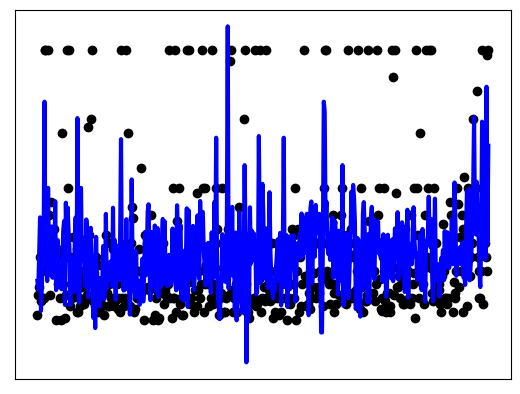

In [98]:
import matplotlib.pyplot as plt

X_test = test_set.drop(['percentage_laid_off', 'total_laid_off'], axis=1)
X_test = X_test.fillna(0)
y_test = test_set["percentage_laid_off"]
y_predict = model.predict(X_test)

X_test.to_csv('test_X.csv',index=False)
y_test.to_csv('test_Y.csv',index=False)

y_predict_df = pd.DataFrame(y_predict, columns=['percentage_laid_off'])

#print("xtest: ", X_test.head(5))




print(y_test.size)
print(arange(0,508,1).size)

# Plot outputs
plt.scatter(arange(0,508,1), y_test, color="black")
plt.plot(arange(0,508,1), y_predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
#the output of this is really ugly dw about it
#plt.show()

In [100]:

print("======================")
print(y_predict_df.head(20))
print("======================")


    percentage_laid_off
0              0.162821
1              0.131887
2              0.268937
3              0.392961
4              0.054268
5              0.142349
6              0.258236
7              0.309425
8              0.812060
9              0.232029
10             0.249900
11             0.162134
12             0.499803
13             0.270627
14             0.198329
15             0.182760
16             0.359832
17             0.174321
18             0.175293
19             0.211313


In [101]:
print("======================")
print(y_test.reset_index(drop=True).head(20))
print("======================")

0     0.04
1     0.11
2     0.14
3     0.25
4     0.09
5     0.10
6     0.22
7     0.10
8     1.00
9     1.00
10    0.20
11    0.40
12    1.00
13    0.40
14    0.11
15    0.45
16    0.25
17    0.28
18    0.30
19    0.35
Name: percentage_laid_off, dtype: float64
